# Análisis Exploratorio de Datos (EDA)

## 0. Introducción

### Qué es un EDA

- Comprender mejor un conjunto de datos:
- Identificar patrones, detectar anomalías, verificar suposiciones y resumir sus principales características

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" />

### DATASET IRIS

El dataset Iris, introducido por Ronald Fisher en 1936, es un clásico conjunto de datos multiclase usado para tareas de clasificación. 

Contiene 150 muestras de tres especies de flores (Iris setosa, Iris virginica e Iris versicolor), con cuatro características:

  1. longitud de sépalos
  2. anchura de sépalos 
  3. Longitud de pétalos
  4. Anchura de pétalos 

<img src="https://media.licdn.com/dms/image/D4D12AQF5vivFTAdZjQ/article-cover_image-shrink_600_2000/0/1700911428185?e=2147483647&v=beta&t=RaJufpE5-ZMvIMZFVTy4dNtvnKHVgmThtTORx-_qu6Q"/>

### Objetivo

El objetivo principal es construir un modelo que, usando estas características, clasifique correctamente las especies de flores con la mayor precisión posible.

## 1. Inicialización y Preparación de Datos

### 1.1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### 1.2 Ajustes iniciales

In [2]:
# Comenta esta linea si tus visualizaciones no se ven
%matplotlib inline

# Configurar estilo de plt
plt.style.use("bmh")
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

## 2. Carga y Preprocesamiento del Dataset

### 2.1 Lectura de datos

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2.2 Preprocesamiento

In [4]:
#Renombramos las variables para falicitar su uso
df.rename({'SepalLengthCm':'SepLen_cm',
           'SepalWidthCm':'SepWid_cm',
           'PetalLengthCm':'PetLen_cm',
           'PetalWidthCm':'PetWid_cm'},
          axis=1, inplace=True)

## 3. Limpieza de Datos

In [5]:
df.drop('Id', axis=1, inplace=True)
df.head(7)

,SepLen_cm,SepWid_cm,PetLen_cm,PetWid_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


## 4. Análisis Descriptivo

In [6]:
df.head(8)

,SepLen_cm,SepWid_cm,PetLen_cm,PetWid_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


#### Dimensiones del Dataset

In [7]:
df.shape

(150, 5)

#### Información General del Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SepLen_cm  150 non-null    float64
 1   SepWid_cm  150 non-null    float64
 2   PetLen_cm  150 non-null    float64
 3   PetWid_cm  150 non-null    float64
 4   Species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepLen_cm,SepWid_cm,PetLen_cm,PetWid_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Recuento de la variable a predecir

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\thiag\AppData\Local\Temp\ipykernel_8432\2799966513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (data= df, x='Species', palette='pastel')


<Axes: xlabel='Species', ylabel='count'>

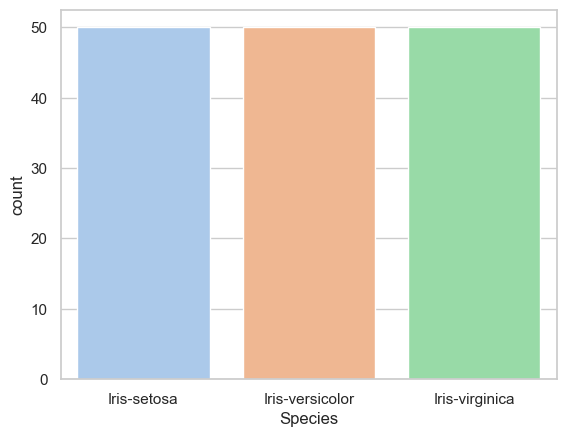

In [29]:
couns = df['Species'].value_counts()
sns.countplot (data= df, x='Species', palette='pastel')

### Comprobamos las variables nulas

In [13]:
df.isnull().sum(axis=0)

sep_l      0
sep_a      0
pet_l      0
pet_a      0
especie    0
dtype: int64

## 5. Analisis Univariante

### 5.1 Longitud del Sépalo

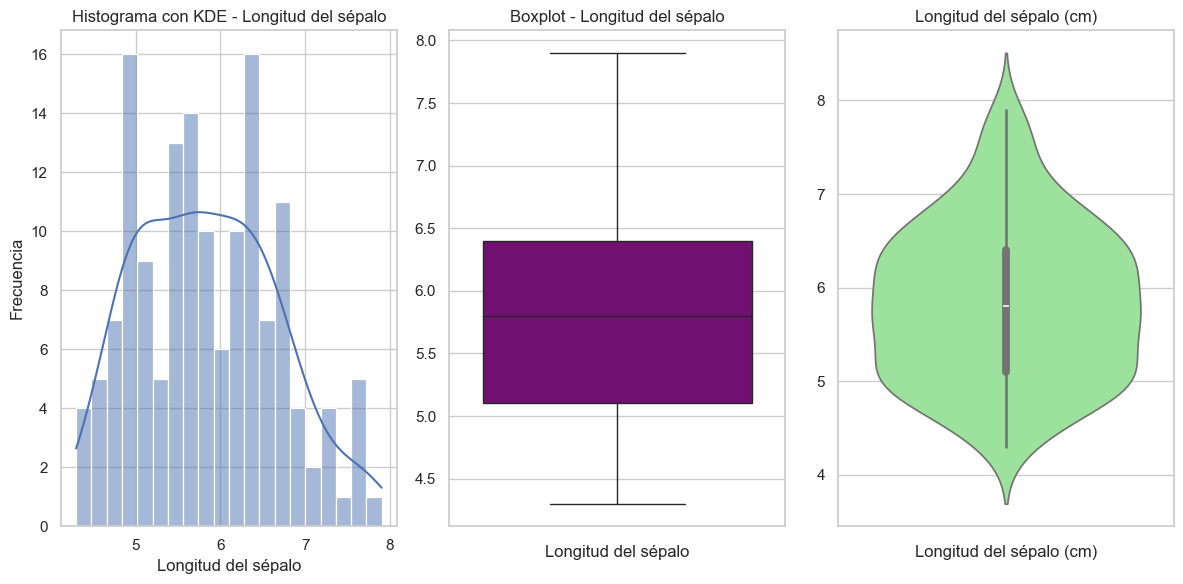

In [16]:
# 1. Histograma con KDE
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.histplot(df['SepLen_cm'], kde=True, bins=20)
plt.title('Histograma con KDE - Longitud del sépalo')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['SepLen_cm'], color='purple')
plt.title('Boxplot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo')
plt.ylabel('')

# 3. Violín plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['SepLen_cm'], color='lightgreen')
plt.title('Longitud del sépalo (cm)')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 5.2 Ancho del Sépalo

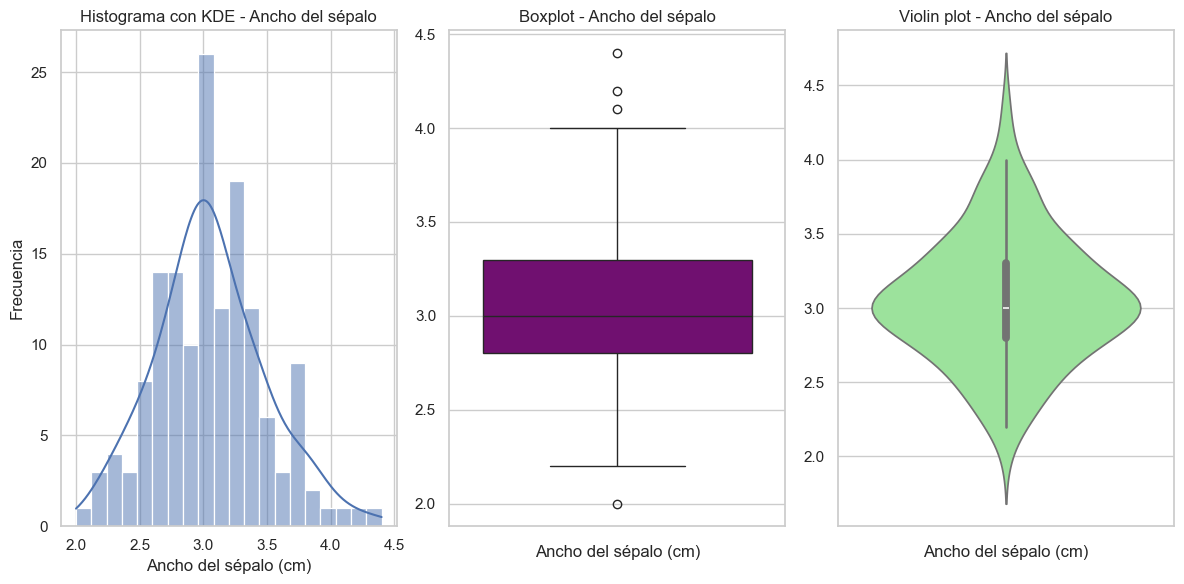

In [17]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['SepWid_cm'], kde=True, bins=20)
plt.title('Histograma con KDE - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['SepWid_cm'], color='purple')
plt.title('Boxplot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['SepWid_cm'], color='lightgreen')
plt.title('Violin plot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 5.3 Longitud del pétalo

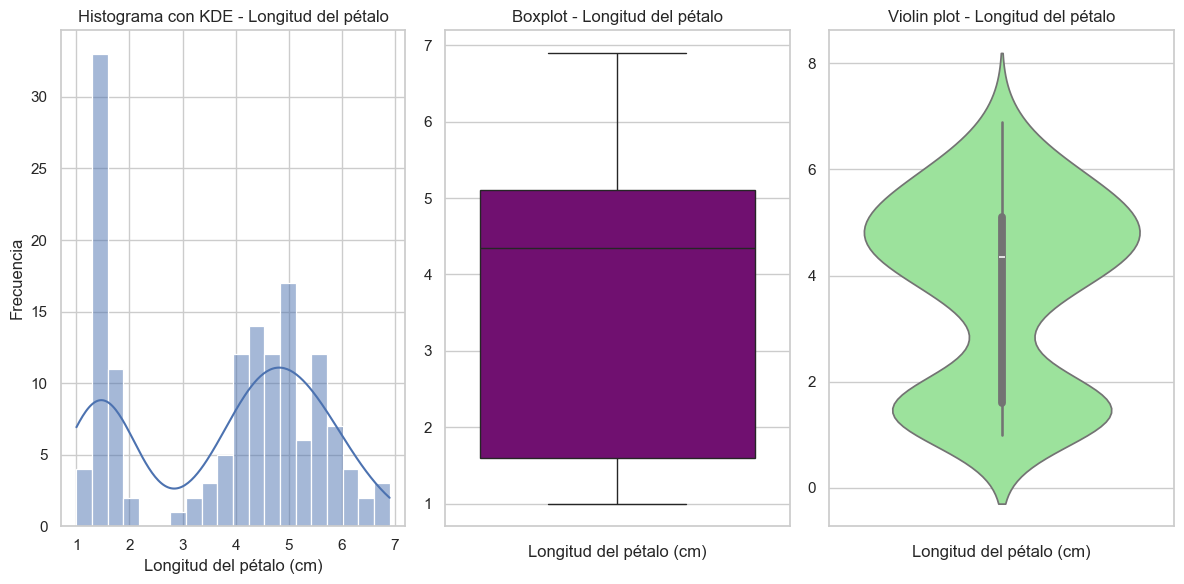

In [18]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['PetLen_cm'], kde=True, bins=20)
plt.title('Histograma con KDE - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['PetLen_cm'], color='purple')
plt.title('Boxplot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['PetLen_cm'], color='lightgreen')
plt.title('Violin plot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 5.4 Ancho del pétalo

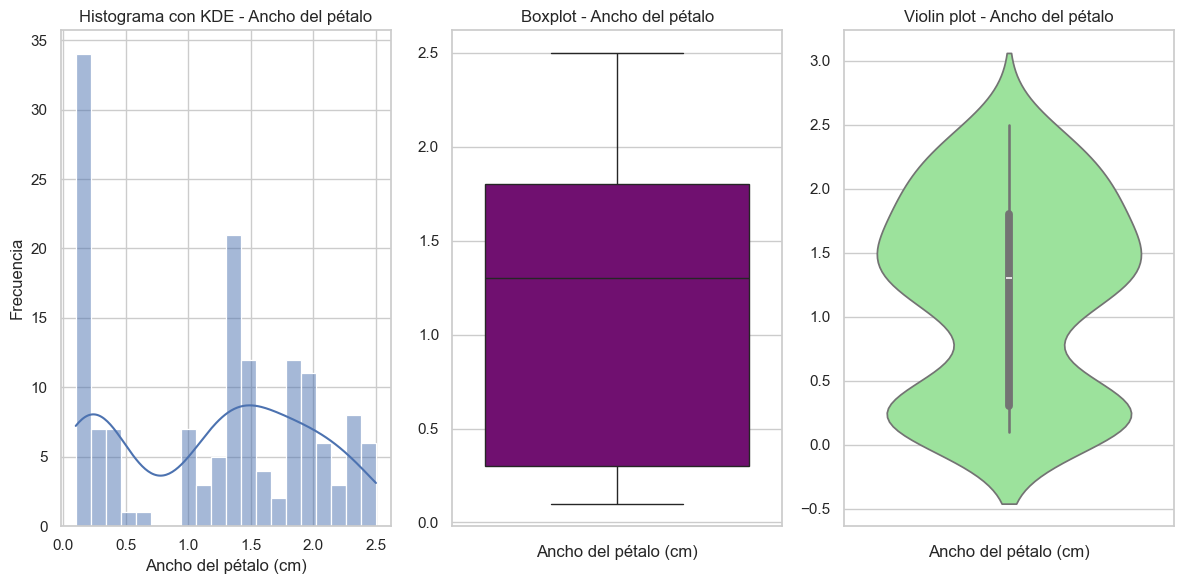

In [19]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['PetWid_cm'], kde=True, bins=20)
plt.title('Histograma con KDE - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['PetWid_cm'], color='purple')
plt.title('Boxplot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['PetWid_cm'], color='lightgreen')
plt.title('Violin plot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## 6. Analisis Multivariante

### 6.1 Longitud de Sépalo y Especie

C:\Users\thiag\AppData\Local\Temp\ipykernel_8432\291597432.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Species', y='SepLen_cm', palette='Set1', ax=axs[0, 1])
C:\Users\thiag\AppData\Local\Temp\ipykernel_8432\291597432.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Species', y='SepLen_cm', palette='Set1', ax=axs[1, 0])


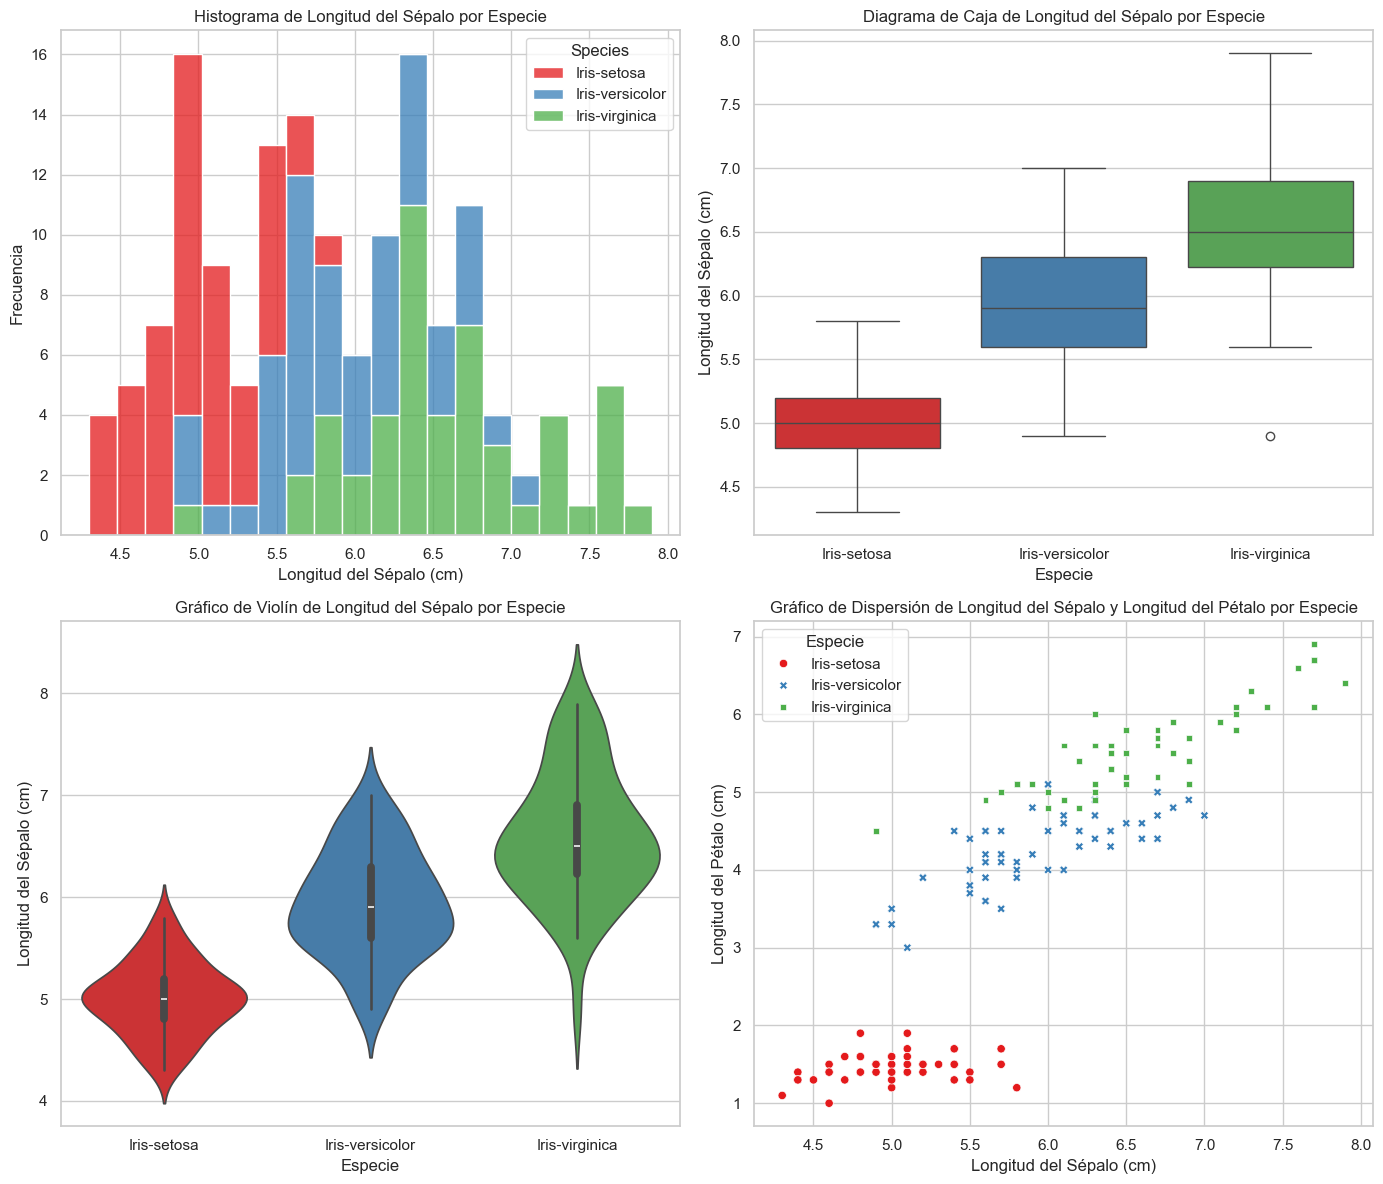

In [27]:
# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Longitud del Sépalo por Especie
sns.histplot(data=df, x='SepLen_cm', hue='Species', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Longitud del Sépalo por Especie')
axs[0, 0].set_xlabel('Longitud del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Longitud del Sépalo por Especie
sns.boxplot(data=df, x='Species', y='SepLen_cm', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Longitud del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Longitud del Sépalo (cm)')

# 3. Gráfico de Violín de Longitud del Sépalo por Especie
sns.violinplot(data=df, x='Species', y='SepLen_cm', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Longitud del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Longitud del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Longitud del Sépalo por Especie
sns.scatterplot(data=df, x='SepLen_cm', y='PetLen_cm', hue='Species', palette='Set1', style='Species', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Longitud del Sépalo y Longitud del Pétalo por Especie')
axs[1, 1].set_xlabel('Longitud del Sépalo (cm)')
axs[1, 1].set_ylabel('Longitud del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.2 Longitud de Sépalo y Especie

C:\Users\thiag\AppData\Local\Temp\ipykernel_8432\370180111.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Species', y='SepWid_cm', palette='Set1', ax=axs[0, 1])
C:\Users\thiag\AppData\Local\Temp\ipykernel_8432\370180111.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Species', y='SepWid_cm', palette='Set1', ax=axs[1, 0])


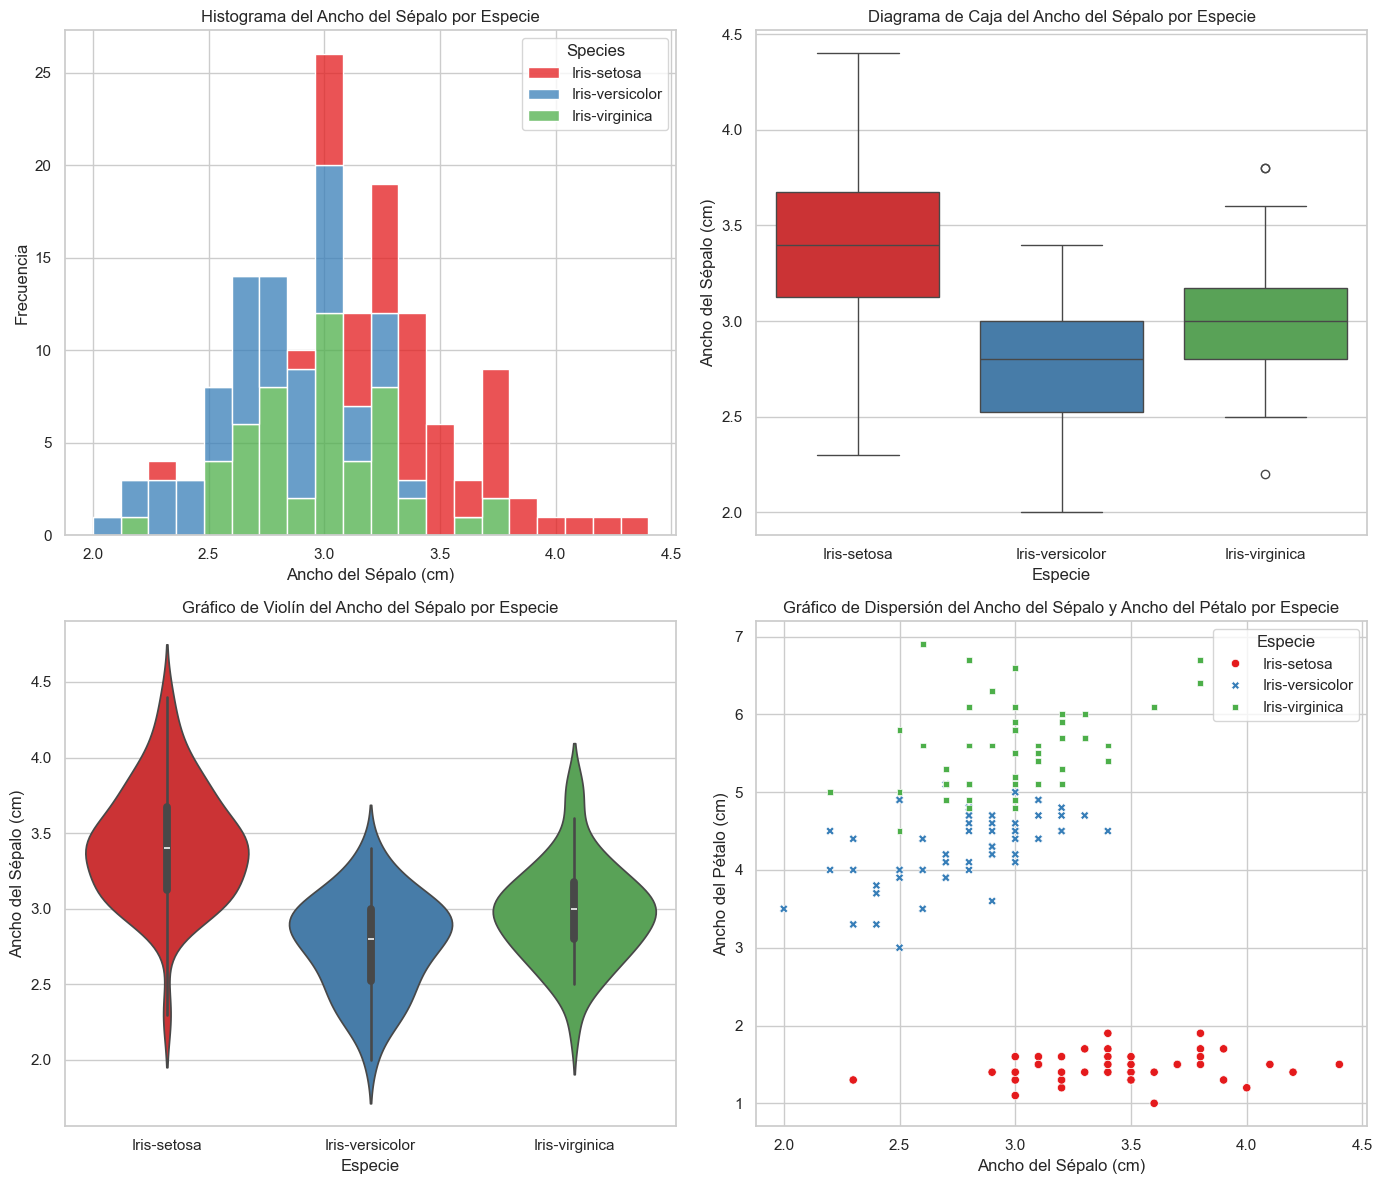

In [30]:
# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Ancho del Sépalo por Especie
sns.histplot(data=df, x='SepWid_cm', hue='Species', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma del Ancho del Sépalo por Especie')
axs[0, 0].set_xlabel('Ancho del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Ancho del Sépalo por Especie
sns.boxplot(data=df, x='Species', y='SepWid_cm', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja del Ancho del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Ancho del Sépalo (cm)')

# 3. Gráfico de Violín de Ancho del Sépalo por Especie
sns.violinplot(data=df, x='Species', y='SepWid_cm', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín del Ancho del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Ancho del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Ancho del Sépalo por Especie
sns.scatterplot(data=df, x='SepWid_cm', y='PetLen_cm', hue='Species', palette='Set1', style='Species', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión del Ancho del Sépalo y Ancho del Pétalo por Especie')
axs[1, 1].set_xlabel('Ancho del Sépalo (cm)')
axs[1, 1].set_ylabel('Ancho del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.3 Relación entre todas las variables

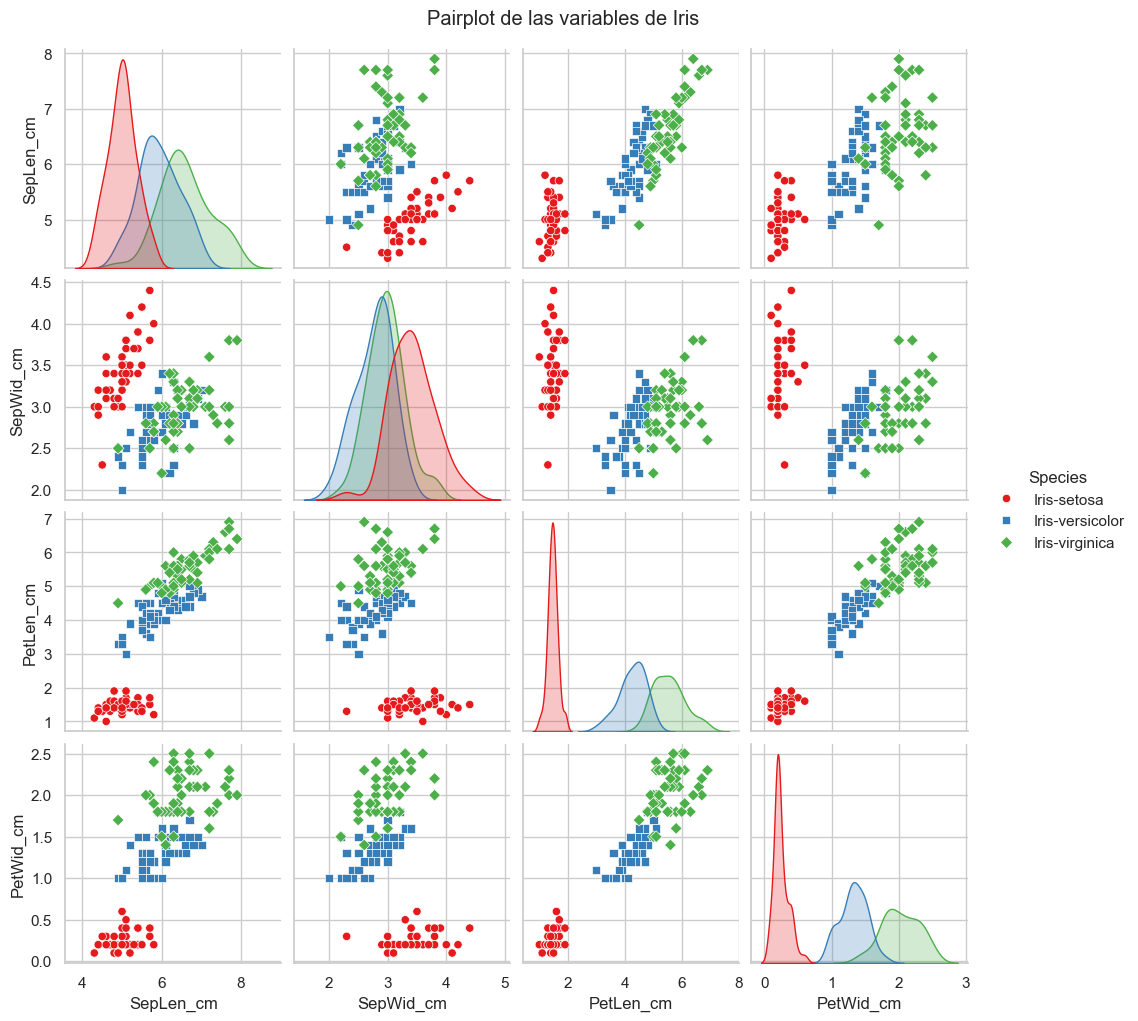

In [22]:
# Pairplot: muestra la relación entre todas las variables
sns.pairplot(df, hue='Species', markers=["o", "s", "D"], palette="Set1")
plt.suptitle('Pairplot de las variables de Iris', y=1.02)
plt.show()

### 6.4 Correlacion entre variables

In [23]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

,SepLen_cm,SepWid_cm,PetLen_cm,PetWid_cm
SepLen_cm,1.000000,-0.109369,0.871754,0.817954
SepWid_cm,-0.109369,1.000000,-0.420516,-0.356544
PetLen_cm,0.871754,-0.420516,1.000000,0.962757
PetWid_cm,0.817954,-0.356544,0.962757,1.000000


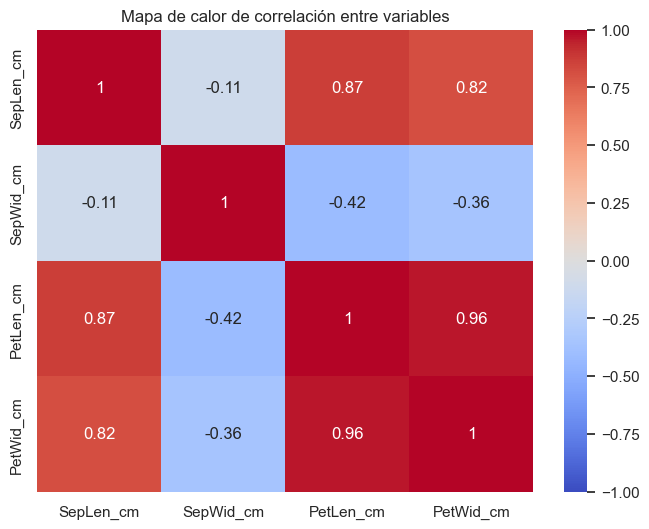

In [24]:
# 2. Heatmap de la correlación entre variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

### 6.5 Relación entre 3 variables

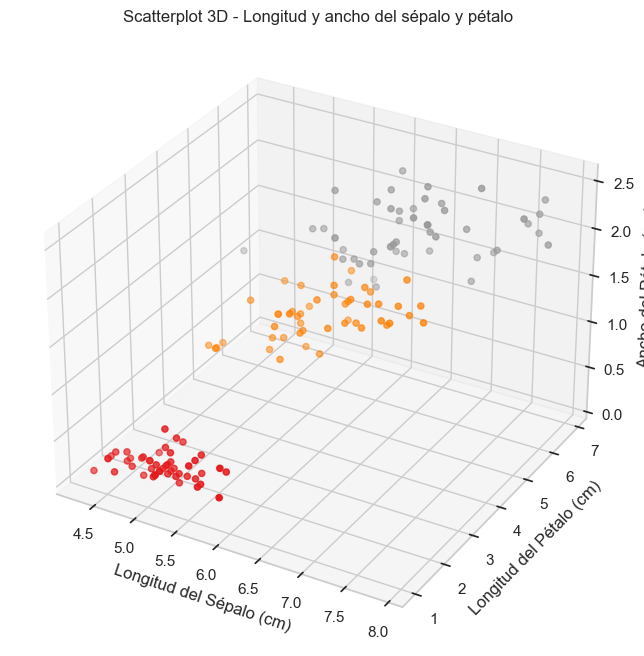

In [25]:
# 3. Scatterplot 3D: mostrar la relación entre 3 variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear scatterplot 3D usando 3 dimensiones: longitud del sépalo, longitud del pétalo y ancho del pétalo
scatter = ax.scatter(
    df['SepLen_cm'], 
    df['PetLen_cm'], 
    df['PetWid_cm'], 
    c=pd.Categorical(df['Species']).codes, 
    cmap='Set1'
)

# Etiquetas
ax.set_xlabel('Longitud del Sépalo (cm)')
ax.set_ylabel('Longitud del Pétalo (cm)')
ax.set_zlabel('Ancho del Pétalo (cm)')
plt.title('Scatterplot 3D - Longitud y ancho del sépalo y pétalo')

# Mostrar gráfico
plt.show()